In [44]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime
from matplotlib import rcParams
import matplotlib as mpl
import warnings
warnings.filterwarnings(action='ignore')


In [45]:
users = pd.read_csv('C:/Users/Taha/Downloads/Springboard-master/relax_challenge/takehome_users.csv',  encoding = 'latin-1', parse_dates = ['creation_time'])
users.invited_by_user_id.isnull().sum()

5583

In [46]:
users.invited_by_user_id = users.invited_by_user_id.fillna(0)
users.invited_by_user_id = users.invited_by_user_id.astype(int)
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240


In [47]:
users.org_id.isnull().sum()

0

In [48]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null int32
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4), object(3)
memory usage: 890.7+ KB


In [49]:
engage = pd.read_csv('C:/Users/Taha/Downloads/Springboard-master/relax_challenge/takehome_user_engagement.csv', parse_dates = ['time_stamp'])
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [50]:
# describe users DF
registered_users_ct = len(users)
mail_ct = users.opted_in_to_mailing_list.sum()
market_ct = users.enabled_for_marketing_drip.sum()

print("All users: {}".format(registered_users_ct))
print('Opted in to mailing list: {} - {:.2f}%'.format(mail_ct, mail_ct/registered_users_ct * 100))
print('Enabled for marketing drip: {} - {:.2f}%'.format(market_ct, market_ct/registered_users_ct * 100))

All users: 12000
Opted in to mailing list: 2994 - 24.95%
Enabled for marketing drip: 1792 - 14.93%


In [51]:
# describe engage df
logged_in_users_ct = engage.user_id.nunique()

print('There were {} logins from {} unique users'.format(len(engage), logged_in_users_ct))
print('{} registered users have never logged in'.format(registered_users_ct - logged_in_users_ct))
engage.head()


There were 207917 logins from 8823 unique users
3177 registered users have never logged in


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [52]:
engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [53]:
# visited is always = 1, so drop the column
engage = engage.drop('visited', axis = 1)

### 1. identify adopted users

In [54]:
def get_rolling_count(grp, freq):
    return grp.rolling(freq, on='time_stamp')['user_id'].count()

engage['visits_7_days'] = engage.groupby('user_id', as_index=False, group_keys=False).apply(get_rolling_count, '7D')

engage.head(30)

,time_stamp,user_id,visits_7_days
0,2014-04-22 03:53:30,1,1.0
1,2013-11-15 03:45:04,2,1.0
2,2013-11-29 03:45:04,2,1.0
3,2013-12-09 03:45:04,2,1.0
4,2013-12-25 03:45:04,2,1.0
5,2013-12-31 03:45:04,2,2.0
6,2014-01-08 03:45:04,2,1.0
7,2014-02-03 03:45:04,2,1.0
8,2014-02-08 03:45:04,2,2.0
9,2014-02-09 03:45:04,2,3.0


In [55]:
adopted = engage[engage.visits_7_days >= 3]
len(adopted)

adopted = adopted.drop_duplicates('user_id', keep = 'first')
adopted_ids = adopted.user_id.tolist()

In [56]:
type(adopted_ids)


list

In [57]:
len(adopted_ids)


1602

In [58]:
users['adopted'] = users.object_id.isin(adopted_ids)

users.adopted.sum()
users.head(20)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240,False
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241,False
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,0,False
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,0,False
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,0,False
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143,True


### 2. Add col for time between account creation and initial login

In [59]:
# get initial login datetime from engage DF
grp = engage.groupby('user_id', as_index = False).agg({'time_stamp' : np.min})
grp.head(20)


,user_id,time_stamp
0,1,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04
2,3,2013-03-19 23:14:52
3,4,2013-05-22 08:09:28
4,5,2013-01-22 10:14:20
5,6,2013-12-19 03:37:06
6,7,2012-12-20 13:24:32
7,10,2013-01-16 22:08:03
8,11,2013-12-27 03:55:54
9,13,2014-03-30 16:19:38


In [60]:
grp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 2 columns):
user_id       8823 non-null int64
time_stamp    8823 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 206.8 KB


In [61]:
# merge initial login column into users DF

grp.columns = ['user_id', 'initial_login']

users = users.merge(grp, how = 'left', left_on = 'object_id', right_on = 'user_id')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,user_id,initial_login
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803,False,1.0,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316,True,2.0,2013-11-15 03:45:04
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525,False,3.0,2013-03-19 23:14:52
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151,False,4.0,2013-05-22 08:09:28
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240,False,5.0,2013-01-22 10:14:20


In [62]:
users.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 13 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null int32
adopted                       12000 non-null bool
user_id                       8823 non-null float64
initial_login                 8823 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64(2), int32(1), int64(4), object(3)
memory usage: 1.2+ MB


In [63]:
users['creation_login_gap'] = (users.initial_login - users.creation_time).dt.days

users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,user_id,initial_login,creation_login_gap
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803,False,1.0,2014-04-22 03:53:30,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316,True,2.0,2013-11-15 03:45:04,0.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525,False,3.0,2013-03-19 23:14:52,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151,False,4.0,2013-05-22 08:09:28,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240,False,5.0,2013-01-22 10:14:20,5.0


In [64]:
users.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 14 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null int32
adopted                       12000 non-null bool
user_id                       8823 non-null float64
initial_login                 8823 non-null datetime64[ns]
creation_login_gap            8823 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(3), int32(1), int64(4), object(3)
memory usage: 1.2+ MB


### 3. Add col for mean time between logins

In [65]:
gap = engage.groupby('user_id').time_stamp.apply(lambda x: x - x.shift()).dt.days
gaps = pd.DataFrame(gap)
gaps.columns = ['mean_gap_length']
gaps.head()

,mean_gap_length
0,NaN
1,NaN
2,14.0
3,10.0
4,16.0


In [66]:
gaps.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 1 columns):
mean_gap_length    199094 non-null float64
dtypes: float64(1)
memory usage: 1.6 MB


In [67]:
engage = engage.merge(gaps, left_index = True, right_index = True)
engage.head()

,time_stamp,user_id,visits_7_days,mean_gap_length
0,2014-04-22 03:53:30,1,1.0,NaN
1,2013-11-15 03:45:04,2,1.0,NaN
2,2013-11-29 03:45:04,2,1.0,14.0
3,2013-12-09 03:45:04,2,1.0,10.0
4,2013-12-25 03:45:04,2,1.0,16.0


In [68]:
gap_mean = engage.groupby('user_id').agg({'mean_gap_length' : np.mean})
gap_mean.head()

,mean_gap_length
user_id,
1,NaN
2,10.461538
3,NaN
4,NaN
5,NaN


In [69]:
# merge mean login gap column into users DF

users = users.merge(gap_mean, how = 'left', left_on = 'object_id', right_on = 'user_id')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,user_id,initial_login,creation_login_gap,mean_gap_length
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803,False,1.0,2014-04-22 03:53:30,0.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316,True,2.0,2013-11-15 03:45:04,0.0,10.461538
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525,False,3.0,2013-03-19 23:14:52,0.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151,False,4.0,2013-05-22 08:09:28,1.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240,False,5.0,2013-01-22 10:14:20,5.0,NaN


In [70]:
users.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 15 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null int32
adopted                       12000 non-null bool
user_id                       8823 non-null float64
initial_login                 8823 non-null datetime64[ns]
creation_login_gap            8823 non-null float64
mean_gap_length               2588 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(4), int32(1), int64(4), object(3)
memory usage: 1.3+ MB


### 4. Add col org id size

In [71]:
# orgs = users[(users.org_id > 10) & (users.org_id < 20)]
orgs = users.org_id.value_counts()
orgs.head(10)

0     319
1     233
2     201
3     168
4     159
6     138
5     128
9     124
7     119
10    104
Name: org_id, dtype: int64

In [72]:
orgs.tail()


396    9
400    8
397    8
386    7
416    2
Name: org_id, dtype: int64

In [73]:
one = users[users.org_id == 396]
one.shape

(9, 15)

In [74]:
o = pd.DataFrame(orgs).reset_index()
o.columns = ['org_id', 'user_count']
o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 2 columns):
org_id        417 non-null int64
user_count    417 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [75]:
def org_size(ct):
    rtn = 'XS'
    if ct > 200:
        rtn = 'XL'
    elif ct > 149:
        rtn = 'L'
    elif ct > 99:
        rtn = 'M'
    elif ct > 49:
        rtn = 'S'

    return rtn

o['org_size'] = o.user_count.apply(org_size)

o.head()

,org_id,user_count,org_size
0,0,319,XL
1,1,233,XL
2,2,201,XL
3,3,168,L
4,4,159,L


In [76]:
org_size_dict = dict(zip(o.org_id, o.org_size))
len(org_size_dict)
org_size_dict[0] = np.nan

In [77]:
users['org_size'] = users.org_id.map(org_size_dict)
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,user_id,initial_login,creation_login_gap,mean_gap_length,org_size
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803,False,1.0,2014-04-22 03:53:30,0.0,NaN,S
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316,True,2.0,2013-11-15 03:45:04,0.0,10.461538,XL
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525,False,3.0,2013-03-19 23:14:52,0.0,NaN,XS
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151,False,4.0,2013-05-22 08:09:28,1.0,NaN,XL
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240,False,5.0,2013-01-22 10:14:20,5.0,NaN,XS


### 5. Add col for bool - invited by user

In [78]:
invites = users.invited_by_user_id.value_counts()
invites.head()

0        5583
10741      13
2527       12
11770      11
2308       11
Name: invited_by_user_id, dtype: int64

In [79]:
i = pd.DataFrame(invites).reset_index()
i.columns = ['inviter_id', 'user_count']
i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565 entries, 0 to 2564
Data columns (total 2 columns):
inviter_id    2565 non-null int64
user_count    2565 non-null int64
dtypes: int64(2)
memory usage: 40.2 KB


In [80]:
def group_size(ct):
    rtn = 'XS'
    if ct > 11:
        rtn = 'XL'
    elif ct > 8:
        rtn = 'L'
    elif ct > 5:
        rtn = 'M'
    elif ct > 3:
        rtn = 'S'
    elif ct == 0:
        rtn = np.nan
    return rtn

i['group_size'] = i.user_count.apply(group_size)

i.head()

,inviter_id,user_count,group_size
0,0,5583,XL
1,10741,13,XL
2,2527,12,XL
3,11770,11,L
4,2308,11,L


In [81]:
group_size_dict = dict(zip(i.inviter_id, i.group_size))
len(group_size_dict)
group_size_dict[0] = np.nan

In [82]:
users['group_size'] = users.invited_by_user_id.map(group_size_dict)
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,user_id,initial_login,creation_login_gap,mean_gap_length,org_size,group_size
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803,False,1.0,2014-04-22 03:53:30,0.0,NaN,S,XS
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316,True,2.0,2013-11-15 03:45:04,0.0,10.461538,XL,XS
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525,False,3.0,2013-03-19 23:14:52,0.0,NaN,XS,L
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151,False,4.0,2013-05-22 08:09:28,1.0,NaN,XL,M
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240,False,5.0,2013-01-22 10:14:20,5.0,NaN,XS,S


### 6. Drop unneeded cols

In [83]:
users = users.drop(['object_id', 'creation_time', 'name', 'email', 'last_session_creation_time', 
                    'invited_by_user_id', 'org_id', 'user_id', 'initial_login'], axis = 1)

In [84]:
y = users.adopted
users = users.drop('adopted', axis = 1)

users.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,creation_login_gap,mean_gap_length,org_size,group_size
0,GUEST_INVITE,1,0,0.0,NaN,S,XS
1,ORG_INVITE,0,0,0.0,10.461538,XL,XS
2,ORG_INVITE,0,0,0.0,NaN,XS,L
3,GUEST_INVITE,0,0,1.0,NaN,XL,M
4,GUEST_INVITE,0,0,5.0,NaN,XS,S


### 7. Transform categoricals

In [85]:
users = pd.get_dummies(users, columns = ['creation_source', 'org_size', 'group_size'])


In [86]:
users = users.join(y)
users.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,creation_login_gap,mean_gap_length,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_size_L,org_size_M,org_size_S,org_size_XL,org_size_XS,group_size_L,group_size_M,group_size_S,group_size_XL,group_size_XS,adopted
0,1,0,0.0,NaN,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,False
1,0,0,0.0,10.461538,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,True
2,0,0,0.0,NaN,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,False
3,0,0,1.0,NaN,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,False
4,0,0,5.0,NaN,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,False


In [87]:
users.mean_gap_length = users.mean_gap_length.fillna(100)

users.creation_login_gap = users.creation_login_gap.fillna(100)

users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 20 columns):
opted_in_to_mailing_list              12000 non-null int64
enabled_for_marketing_drip            12000 non-null int64
creation_login_gap                    12000 non-null float64
mean_gap_length                       12000 non-null float64
creation_source_GUEST_INVITE          12000 non-null uint8
creation_source_ORG_INVITE            12000 non-null uint8
creation_source_PERSONAL_PROJECTS     12000 non-null uint8
creation_source_SIGNUP                12000 non-null uint8
creation_source_SIGNUP_GOOGLE_AUTH    12000 non-null uint8
org_size_L                            12000 non-null uint8
org_size_M                            12000 non-null uint8
org_size_S                            12000 non-null uint8
org_size_XL                           12000 non-null uint8
org_size_XS                           12000 non-null uint8
group_size_L                          12000 non-null uint8
gr

In [88]:
users.to_csv('C:/Users/Taha/Downloads/Springboard-master/relax_challenge/modeling.csv')

## Modeling

In [89]:
# sklearn imports
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

test_file_url = 'C:/Users/Taha/Downloads/Springboard-master/relax_challenge/modeling.csv'
# set random_state SEED variable
SEED = 42

In [90]:
# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# training set breakdown
train_success = y_train.sum()
train_total = len(y_train)
train_percent = train_success / train_total
print('Training Set\nSuccesses:\t{}\nTotal:\t\t{}\nPercent:\t{:.3f}\n'.format(train_success, train_total, train_percent))

# test set breakdown
test_success = y_test.sum()
test_total = len(y_test)
test_percent = test_success / test_total
print('Test Set\nSuccesses:\t{}\nTotal:\t\t{}\nPercent:\t{:.3f}\n\n'.format(test_success, test_total, test_percent))

Training Set
Successes:	1116
Total:		8400
Percent:	0.133

Test Set
Successes:	486
Total:		3600
Percent:	0.135




### SMOTE

In [92]:
#imports
from imblearn.over_sampling import SMOTE

# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# training set breakdown
train_success = y_train_sm.sum()
train_total = len(y_train_sm)
train_percent = train_success / train_total
print('Training Set\nSuccesses:\t{}\nTotal:\t\t{}\nPercent:\t{:.3f}\n'.format(train_success, train_total, train_percent))

# test set breakdown
test_success = y_test.sum()
test_total = len(y_test)
test_percent = test_success / test_total
print('Test Set\nSuccesses:\t{}\nTotal:\t\t{}\nPercent:\t{:.3f}\n\n'.format(test_success, test_total, test_percent))

Training Set
Successes:	7284
Total:		14568
Percent:	0.500

Test Set
Successes:	486
Total:		3600
Percent:	0.135




### Random Forest

Accuracy: 0.9636
              precision    recall  f1-score   support

       False       0.98      0.98      0.98      3114
        True       0.88      0.84      0.86       486

   micro avg       0.96      0.96      0.96      3600
   macro avg       0.93      0.91      0.92      3600
weighted avg       0.96      0.96      0.96      3600



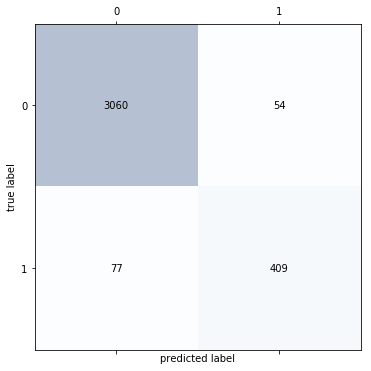

In [95]:
from sklearn.ensemble import RandomForestClassifier

# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# instantiate & fit
model = RandomForestClassifier(random_state = SEED)
model.fit(X_train_sm, y_train_sm)

# make predictions on the test set
y_pred = model.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

### Random Forest - Tuning


In [108]:
# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# instantiate the learning algorithm
model = RandomForestClassifier(random_state = SEED)

# create a params dict
depth = [2, 3, 4, 5]#, 6, 10, 15, 20]
min_samples = [.01, .025, .05, .075]#, .1, .2]
est = [5, 10, 50, 100]#, 500]
hyperparameters = dict(max_depth = depth, 
                       min_samples_leaf = min_samples,
                       n_estimators = est)

# instantiate grid search
gridsearch = GridSearchCV(model, hyperparameters, cv = 5, verbose = 0)

# fit grid search
best_model = gridsearch.fit(X_train_sm, y_train_sm)


In [109]:
# print the best hyperparameters
best_depth = best_model.best_estimator_.get_params()['max_depth']
best_min_samples = best_model.best_estimator_.get_params()['min_samples_leaf']
best_est = best_model.best_estimator_.get_params()['n_estimators']
print('Best max_depth: {}'.format(best_depth))
print('Best min_samples_leaf: {}'.format(best_min_samples))
print('Best n_estimators: {}'.format(best_est))


Best max_depth: 5
Best min_samples_leaf: 0.01
Best n_estimators: 50


Accuracy: 0.9647222222222223
              precision    recall  f1-score   support

       False       1.00      0.96      0.98      3114
        True       0.81      0.97      0.88       486

   micro avg       0.96      0.96      0.96      3600
   macro avg       0.90      0.97      0.93      3600
weighted avg       0.97      0.96      0.97      3600

mean_gap_length                       0.694610
creation_login_gap                    0.205576
org_size_XS                           0.039857
org_size_S                            0.015963
creation_source_PERSONAL_PROJECTS     0.015945
org_size_M                            0.007616
org_size_XL                           0.005747
opted_in_to_mailing_list              0.003342
org_size_L                            0.002992
group_size_S                          0.002310
creation_source_GUEST_INVITE          0.001609
enabled_for_marketing_drip            0.001400
group_size_XS                         0.001095
creation_source_ORG_INVITE       

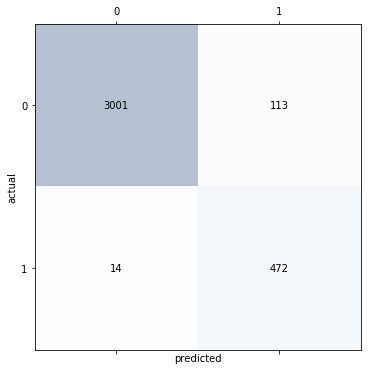

In [110]:
# BUILD MODEL WITH BEST HYPERPARAMETERS

# instantiate a RandomForestClassifier
tuned_model = RandomForestClassifier(max_depth = best_depth,
                                     min_samples_leaf = best_min_samples,
                                     n_estimators = best_est,
                                     random_state = SEED,
                                     n_jobs = -1)

# train the model
tuned_model.fit(X_train_sm, y_train_sm)

# make predictions
tuned_model_y_pred = tuned_model.predict(X_test)

# SCORING
# accuracy
acc = accuracy_score(y_test, tuned_model_y_pred)
print('Accuracy: {}'.format(acc))

# classification report
print(classification_report(y_test, tuned_model_y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = tuned_model_y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted')
plt.ylabel('actual')

# take a look at feature importance
imp = pd.Series(tuned_model.feature_importances_, index=X.columns)
imp = imp.sort_values(ascending=False)
print(imp)

## Conclusion

Encouraging users to login as they sign up and again soon after account creation will, according to this data, increase the 
number of adopted users. Perhaps another department should create a short series of tips on how to get the most out of the app 
and send some number of emails offering these tips at different times of day over the course of the first several days after a 
new user creates an account. We could track and model response data from these emails and decide how to proceed from there. 
